<a href="https://colab.research.google.com/github/Darshan-Deepak/DS/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is done on the fuel stations drilled in New Jersey.
Digital Geodata Series DGS17-1 Oil and Natural Gas Exploration Wells Drilled In New Jersey, this data set was taken from Department of environmental protection.
https://www.nj.gov/dep/njgs/geodata/dgs17-1.htm

DARSHAN DEEPAK

In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [3]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download

zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp') #load the shapefile with gpd as njC

<Axes: >

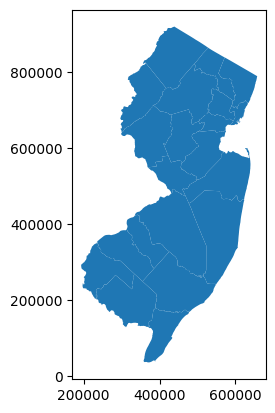

In [4]:
njC0.plot()

Thematic/choloropleth maps

In [5]:
! wget -q -O nj-counties.zip https://docs.google.com/uc?id=1xJDhcRCkgv7k4tNCa72Oog5bohV6dTB2&export=download
zip_ref = zipfile.ZipFile('nj-counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njC0=gpd.read_file('nj_counties.shp')

In [6]:
njC0.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [7]:
njC0.head(50)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17..."
5,CUMBERLAND,Cumberland County,CUM,County of Cumberland,882275,34011,11,321150.321572,501.797378,156898,...,138053,132866,313,292,275,265,SOUTHERN,704221.618565,1.398925e+10,"POLYGON ((333743.882 268331.623, 341456.371 26..."
6,ESSEX,Essex County,ESS,County of Essex,882276,34013,13,83034.859489,129.741968,783969,...,748281,850451,6044,6118,5768,6556,NORTHEASTERN,344556.557700,3.616984e+09,"POLYGON ((541167.940 755990.810, 541175.500 75..."
7,GLOUCESTER,Gloucester County,GLO,County of Gloucester,882277,34015,15,215166.893094,336.198271,288288,...,230082,199917,857,758,684,595,SOUTHERN,560703.567470,9.372632e+09,"POLYGON ((315566.250 382993.340, 315650.440 38..."
8,HUDSON,Hudson County,HUD,County of Hudson,882278,34017,17,32982.400794,51.535001,634266,...,553099,556972,12309,11817,10733,10808,NORTHEASTERN,381357.990132,1.436708e+09,"MULTIPOLYGON (((586210.281 660143.720, 586222...."
9,HUNTERDON,Hunterdon County,HUN,County of Hunterdon,882228,34019,19,279885.206384,437.320635,128349,...,107776,87361,293,279,246,200,CENTRAL,561760.929390,1.219175e+10,"POLYGON ((391770.815 705704.676, 392388.938 70..."


In [8]:
njC=njC0[['COUNTY','COUNTY_LAB','POP2010','POPDEN2010','geometry']]

<Axes: >

[]

[]

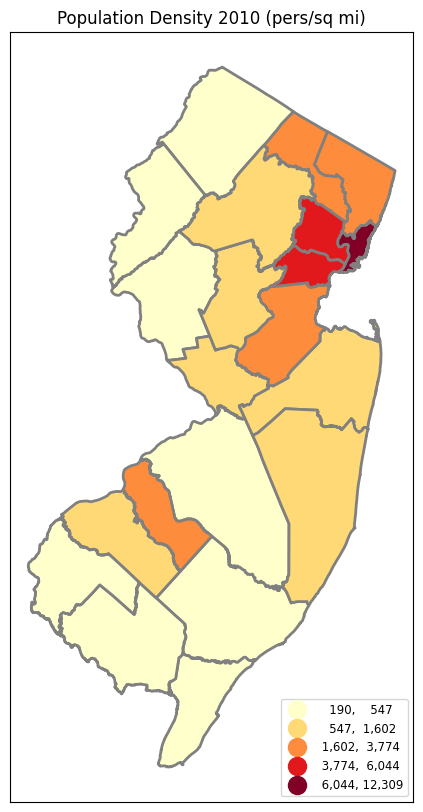

In [9]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,column='POPDEN2010',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("Population Density 2010 (pers/sq mi)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

In [10]:
! wget -q -O njc0.zip https://docs.google.com/uc?id=1YW1RclPKsBCKvGXg9-kXBPsXx7oaoKkl&export=download
zip_ref = zipfile.ZipFile('njc0.zip','r');
zip_ref.extractall();
zip_ref.close()

geo =gpd.read_file('OilGasWells.shp')
geo.dtypes
geo.head(20)

ID             float64
COMPANY_NA      object
WELL_NA         object
COUNTY          object
MUN             object
PERMIT_NUM      object
CNSTR_DAT       object
TOTALDPTH       object
NOTES           object
NORTHING       float64
EASTING        float64
LATITUDE       float64
LONGITUDE      float64
geometry      geometry
dtype: object

,ID,COMPANY_NA,WELL_NA,COUNTY,MUN,PERMIT_NUM,CNSTR_DAT,TOTALDPTH,NOTES,NORTHING,EASTING,LATITUDE,LONGITUDE,geometry
0,1.0,Property of John Garrison,Garrison,Bergen,Mahwah Twp,None,before 1868,400,near Darlington,812945.000000,572431.000000,410353.347,741231.526,POINT (572431.000 812945.000)
1,3.0,Cumberland Oil & Gas Co. Steelman Farm,Cumberland,Cumberland,Millville City,35-13-461,1916,705,3 miles east of Millville. Atlas sheet coordin...,202017.500000,357750.900000,392313.415,745831.626,POINT (357750.900 202017.500)
2,7.0,"The N.J. Gas Fields Co., Inc.",Driver 1,Monmouth,Jackson Twp,28-33-636,1919-20,1100+,Location base on atlas sheet coordinates in fi...,471501.400000,501014.600000,400740.406,742805.546,POINT (501014.600 471501.400)
3,8.0,"The N.J. Gas Fields Co., Inc., Donna Mathews L...",Driver 2,Ocean,Jackson Twp,None,1919-21,3342,"In 1929 drilled out side of csg from 2,200 to ...",478994.658333,541657.591667,400853.980,741922.080,POINT (541657.592 478994.658)
4,9.0,"The N.J. Gas Fields Co., Inc., Donna Mathews L...",Driver 3,Ocean,Jackson Twp,None,1921-29,5022,The location is based on the atlas sheet coor...,479262.887500,541181.029167,400856.640,741928.200,POINT (541181.029 479262.888)
5,10.0,"Van Horn Oil Co., Martin Dolak Lease",Van Horn,Somerset,Hillsborough Twp,None,1947,2383,Location based on atlas sheet coordinates and ...,605078.300000,463884.700000,402940.375,743605.566,POINT (463884.700 605078.300)
6,11.0,Trascontinental Gas Pipeline Corp.,Transco 1,Burlington,Woodland Twp,32-13-576,1951,1140,"Locaation based on well record survey data, M...",366522.078181,487036.113234,395022.860,743105.240,POINT (487036.113 366522.078)
7,12.0,Trascontinental Gas Pipeline Corp.,Transco 2,Burlington,Woodland Twp,32-13-645,1951,881,Lebanon State Forest. Location based on well r...,370201.188889,493335.533333,395059.230,742944.480,POINT (493335.533 370201.189)
8,13.0,Trascontinental Gas Pipeline Corp.,Transco 3,Burlington,Woodland Twp,32-13-537,1951,1207,Lebanon State Forest. Location based on well r...,372426.044444,489430.000000,395121.220,743034.560,POINT (489430.000 372426.044)
9,14.0,Trascontinental Gas Pipeline Corp.,Transco 4,Burlington,Woodland Twp,32-13-527,1951,900,Lebanon State Forest. Location based on well r...,371682.200000,486345.000000,395113.860,743114.110,POINT (486345.000 371682.200)


In [11]:
geo['enr'] = geo.NORTHING.astype(float)

<Axes: >

<Axes: >

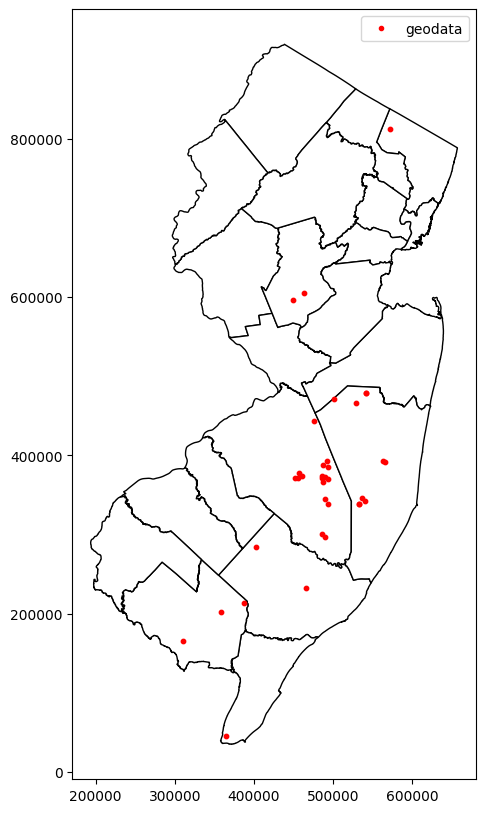

In [12]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
geo.plot(ax=ax, marker='o', color='red', markersize=10,legend=True)
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='geodata', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

join/merge

Now I took a dataset which has the number of gas stations in New Jersey.
https://afdc.energy.gov/stations/#/analyze?region=US-NJ&show_map=true&country=US&access=public&access=private&fuel=BD&fuel=CNG&fuel=E85&fuel=HY&fuel=LNG&fuel=LPG&fuel=ELEC&lpg_secondary=true&hy_nonretail=true&ev_levels=all

In [13]:
! wget -q -O fuel.csv https://docs.google.com/uc?id=1Qf61l9jDvZtbw_AoAW4PZ1eHwBq2K4zN&export=download

#zip_ref = zipfile.ZipFile('crash.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
fuel=gpd.read_file('fuel.csv')

In [14]:
#fuel = gpd.read_file('https://github.com/Darshan-Deepak/DS/raw/main/fuel.csv')

In [15]:
fuel.head(10)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,Restricted Access,RD Blends,RD Blends (French),RD Blended with Biodiesel,RD Maximum Biodiesel Level,NPS Unit Name,CNG Station Sells Renewable Natural Gas,LNG Station Sells Renewable Natural Gas,Maximum Vehicle Class,geometry
0,LPG,Awisco,24 Lakeside Ave,At Standish,West Orange,NJ,07052,,973-736-0200,E,...,false,,,,,,,,HD,None
1,LPG,Modern Propane Gas Co,199 Route 46 W,1 mile west of Teterboro Airport,Lodi,NJ,07644,,973-778-0812,E,...,false,,,,,,,,HD,None
2,LPG,U-Haul,276 Tonnelle Ave,At Tonnelle Cir,Jersey City,NJ,07306,,201-963-6176,E,...,false,,,,,,,,HD,None
3,LPG,U-Haul,397 Route 18 S,"East of New Jersey Turnpike, just past Lowe's.",East Brunswick,NJ,08816,,732-254-9148,E,...,false,,,,,,,,HD,None
4,CNG,New Jersey Natural Gas - Ocean Division Operat...,775 Vassar Ave,,Lakewood Township,NJ,08701,,732-919-8000,E,...,,,,,,,false,,HD,None
5,CNG,Port Authority of New York and New Jersey - Ho...,13th & Provost St,,Jersey City,NJ,07310,,,E,...,,,,,,,false,,MD,None
6,BD,Woolley Fuel Co,12 Burnett Ave,At Springfield Avenue.,Maplewood,NJ,07040,,973-762-7400,E,...,false,,,,,,,,MD,None
7,BD,Princeton Plasma Physics Laboratory,100 Stellarator Rd,,Princeton,NJ,08453,,,E,...,,,,,,,,,,None
8,E85,Princeton Plasma Physics Laboratory,100 Stellarator Rd,,Princeton,NJ,08453,,,E,...,,,,,,,,,,None
9,E85,Mighty Joe's Gas Station,1231 Route 206,,Shamong,NJ,08088,,609-268-0303,E,...,false,,,,,,,,MD,None


In [16]:
fuel.dtypes

Fuel Type Code                               object
Station Name                                 object
Street Address                               object
Intersection Directions                      object
City                                         object
                                             ...   
NPS Unit Name                                object
CNG Station Sells Renewable Natural Gas      object
LNG Station Sells Renewable Natural Gas      object
Maximum Vehicle Class                        object
geometry                                   geometry
Length: 74, dtype: object

In [17]:
fuel1=fuel[['Fuel Type Code','City']]
fuel1.rename(columns={'Fuel Type Code': 'fuel_code'}, inplace=True)
fuel1.rename(columns={'City': 'COUNTY'}, inplace=True)
fuel1

<ipython-input-17-c2ceffaa5b0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel1.rename(columns={'Fuel Type Code': 'fuel_code'}, inplace=True)
<ipython-input-17-c2ceffaa5b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel1.rename(columns={'City': 'COUNTY'}, inplace=True)


,fuel_code,COUNTY
0,LPG,West Orange
1,LPG,Lodi
2,LPG,Jersey City
3,LPG,East Brunswick
4,CNG,Lakewood Township
...,...,...
1254,ELEC,Cape May Court House
1255,ELEC,North Brunswick Township
1256,ELEC,Newark
1257,ELEC,Hamilton Township


aok: no, these are NOT counties but cities!! error

In [18]:
fuel2=fuel1.iloc[1:,:]
fuel2

,fuel_code,COUNTY
1,LPG,Lodi
2,LPG,Jersey City
3,LPG,East Brunswick
4,CNG,Lakewood Township
5,CNG,Jersey City
...,...,...
1254,ELEC,Cape May Court House
1255,ELEC,North Brunswick Township
1256,ELEC,Newark
1257,ELEC,Hamilton Township


In [19]:
fuel2['FUEL_CODE']=fuel2['fuel_code'].str.upper()
fuel1=fuel2
fuel1

<ipython-input-19-0810a8e6d07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel2['FUEL_CODE']=fuel2['fuel_code'].str.upper()


,fuel_code,COUNTY,FUEL_CODE
1,LPG,Lodi,LPG
2,LPG,Jersey City,LPG
3,LPG,East Brunswick,LPG
4,CNG,Lakewood Township,CNG
5,CNG,Jersey City,CNG
...,...,...,...
1254,ELEC,Cape May Court House,ELEC
1255,ELEC,North Brunswick Township,ELEC
1256,ELEC,Newark,ELEC
1257,ELEC,Hamilton Township,ELEC


In [20]:
fuel_gs = fuel1.head(50)
fuel_gs

,fuel_code,COUNTY,FUEL_CODE
1,LPG,Lodi,LPG
2,LPG,Jersey City,LPG
3,LPG,East Brunswick,LPG
4,CNG,Lakewood Township,CNG
5,CNG,Jersey City,CNG
6,BD,Maplewood,BD
7,BD,Princeton,BD
8,E85,Princeton,E85
9,E85,Shamong,E85
10,CNG,Trenton,CNG


In [21]:
geo['TOTALDPTH'] = geo['TOTALDPTH'].astype(str)
geo['TOTALDPTH'] = geo['TOTALDPTH'].str.replace('+', '', regex=False)



In [22]:
#geo['TOTALDPTH'] = pd.to_numeric(geo['TOTALDPTH'], errors='coerce')
#geo.dropna(subset=['TOTALDPTH'], inplace=True)
#geo['TOTALDPTH'] = geo['TOTALDPTH'].apply(lambda x: float(x) if x.replace('.', '', 1).isdigit() else -1)

geo['TOTALDPTH'] = geo['TOTALDPTH'].astype(float)


In [23]:
njCG = pd.merge(geo, fuel1, on='COUNTY',how='outer',indicator=True) #(make sure to have njC shapefile from previous sec)
njCG[['FUEL_CODE','COUNTY','TOTALDPTH','_merge']] #all good, NEW JERSEY expected not to merge

njC2 = pd.merge(geo, fuel1, left_on = 'COUNTY', right_on = 'COUNTY',how='inner')

,FUEL_CODE,COUNTY,TOTALDPTH,_merge
0,NaN,Bergen,400.0,left_only
1,NaN,Cumberland,705.0,left_only
2,NaN,Cumberland,3720.0,left_only
3,NaN,Cumberland,1200.0,left_only
4,NaN,Monmouth,1100.0,left_only
...,...,...,...,...
1433,ELEC,Jackson Township,NaN,right_only
1434,ELEC,Parsippany Troy Hills,NaN,right_only
1435,ELEC,Stone Harbor,NaN,right_only
1436,ELEC,Bernards,NaN,right_only


<Axes: >

[]

[]

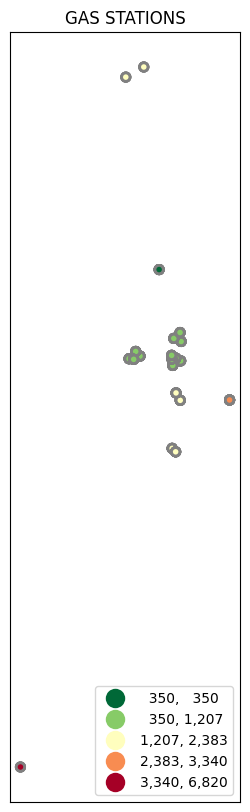

In [24]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC2.plot(ax=ax,column='TOTALDPTH',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
#leg1.set_title("white color=missing")
ax.title.set_text("GAS STATIONS")
ax.set_xticks([])
ax.set_yticks([])
#ax.set_xlabel('''source/definition: zillow.com/research/data''')

In [25]:
unique_values = njC2['TOTALDPTH'].unique()
print(unique_values)

[2383. 2100. 1140.  881. 1207.  900.  908.  902.  852.  928.  954.  952.
 1515. 1519. 1701. 1658. 3200.  350. 3340. 6820.]


<Axes: >

<Axes: >

[]

[]

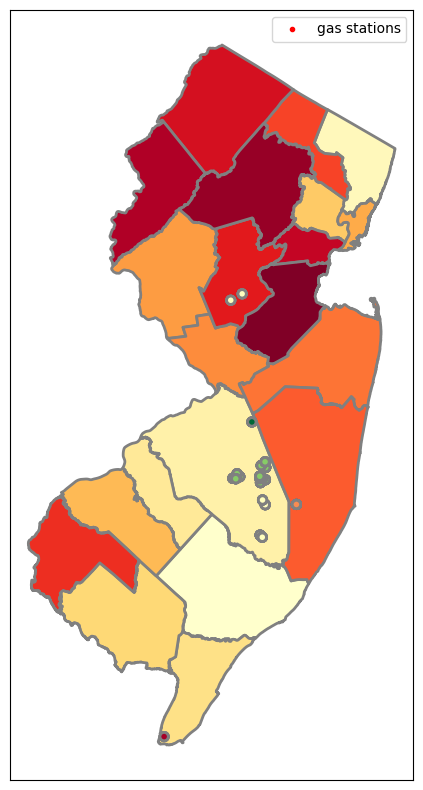

In [26]:
fig, ax = plt.subplots(1, figsize=(6,10))
njC.plot(ax=ax,legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
njC2.plot(ax=ax,column='TOTALDPTH',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.set_xticks([])
ax.set_yticks([])
#col.plot(column='enr',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
#ax.set_title('Watersheds by area ($mi^2$)')

#custom legend
#https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
#import matplotlib.patches as mpatches
#red_patch = mpatches.Patch(color='red', label='The red data')
from matplotlib.lines import Line2D
point = Line2D([0], [0], label='gas stations', marker='o', markersize=3,
         markeredgecolor='r', markerfacecolor='r', linestyle='')
plt.legend(handles=[point])

ALTERNATIVE FUELED VECHILES

In [27]:
! wget -q -O AFV.geojson https://docs.google.com/uc?id=1mKH6odkpzDXnpXTfudf13OhwpqzcLJpN&export=download

#zip_ref = zipfile.ZipFile('crash.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
njCA=gpd.read_file('AFV.geojson')

In [28]:
njCA.head(5)
njCA.columns

,OBJECTID,FUEL_TYPE,STATION_NAME,STREET_ADDRESS,CITY,STATE,ZIP,STATION_PHONE,STATUS_CODE,GROUPS_WITH_ACCESS,...,OPEN_DATE,NJSPC83_X,NJSPC83_Y,FACILITY_TYPE,ACCESS_CODE,CNG_FILL_TYPE,CNG_PSI,EV_PRICING,CNG_VEHICLE_CLASS,geometry
0,1,ELEC,Dock's Oyster House - Tesla Destination,2405 Atlantic Ave,Atlantic City,NJ,08401,609-345-0092 877-798-3752,E,Public,...,2017-11-20,508764,190802,RESTAURANT,public,None,None,Free,None,POINT (-74.44115 39.35723)
1,2,ELEC,Central United Methodist Church,5 Marvin Ave,Linwood,NJ,08221,None,E,Private,...,2019-12-12,474847,191007,PLACE_OF_WORSHIP,private,None,None,None,None,POINT (-74.56111 39.35779)
2,3,ELEC,RESORTS CASINO SURFACE LOT,1201 Boardwalk,Atlantic City,NJ,08401,888-758-4389,E,Public,...,2023-09-01,513905,191306,None,public,None,None,None,None,POINT (-74.42297 39.35860)
3,4,ELEC,FAA - ACT - Station 1,1822 Atlantic Ave,Atlantic City,NJ,08401,None,E,Private,...,2021-01-15,510927,191779,FED_GOV,private,None,None,Free,None,POINT (-74.43350 39.35991)
4,5,ELEC,FAA - ACT - Station 2,1822 Atlantic Ave,Atlantic City,NJ,08401,None,E,Private,...,2021-01-15,510927,191779,FED_GOV,private,None,None,None,None,POINT (-74.43350 39.35991)


Index(['OBJECTID', 'FUEL_TYPE', 'STATION_NAME', 'STREET_ADDRESS', 'CITY',
       'STATE', 'ZIP', 'STATION_PHONE', 'STATUS_CODE', 'GROUPS_WITH_ACCESS',
       'ACCESS_INFO', 'ACCESS_HOURS', 'CARDS_ACCEPTED', 'BD_BLENDS',
       'EV_LEVEL_1', 'EV_LEVEL_2', 'EV_DC_FAST', 'EV_NETWORK',
       'EV_NETWORK_WEBSITE', 'GEOCODE_STATUS', 'OWNER_TYPE',
       'FEDERAL_AGENCY_ID', 'FEDERAL_AGENCY_NAME', 'LPG_PRIMARY',
       'E85_BLENDER', 'EV_CONNECTOR_TYPE', 'LATITUDE', 'LONGITUDE',
       'DATE_LAST_CONFIRMED', 'ID', 'UPDATED_AT', 'OPEN_DATE', 'NJSPC83_X',
       'NJSPC83_Y', 'FACILITY_TYPE', 'ACCESS_CODE', 'CNG_FILL_TYPE', 'CNG_PSI',
       'EV_PRICING', 'CNG_VEHICLE_CLASS', 'geometry'],
      dtype='object')

In [29]:
njCAB = njCA[['CITY', 'STREET_ADDRESS']]
njCAB.rename(columns={'CITY': 'COUNTY'}, inplace=True)
njCAB

<ipython-input-29-b079320d52cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  njCAB.rename(columns={'CITY': 'COUNTY'}, inplace=True)


,COUNTY,STREET_ADDRESS
0,Atlantic City,2405 Atlantic Ave
1,Linwood,5 Marvin Ave
2,Atlantic City,1201 Boardwalk
3,Atlantic City,1822 Atlantic Ave
4,Atlantic City,1822 Atlantic Ave
...,...,...
1269,Mahwah,933 MacArthur Blvd
1270,Mahwah,933 MacArthur Blvd
1271,Mahwah,933 MacArthur Blvd
1272,Mahwah,933 MacArthur Blvd


In [30]:
njC.COUNTY_LAB

0       Atlantic County
1         Bergen County
2     Burlington County
3         Camden County
4       Cape May County
5     Cumberland County
6          Essex County
7     Gloucester County
8         Hudson County
9      Hunterdon County
10        Mercer County
11      Monmouth County
12         Ocean County
13       Passaic County
14         Salem County
15      Somerset County
16        Sussex County
17         Union County
18        Warren County
19        Morris County
20     Middlesex County
Name: COUNTY_LAB, dtype: object

In [31]:
njC['U.S. County']=njC['COUNTY_LAB'].str.replace(' County','') #get rid of ' County' [note space in front of county]
njC['U.S. County']

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: U.S. County, dtype: object

In [32]:
njCAB = pd.merge(njC, njCAB, on = 'COUNTY',how='outer',indicator=True)
njCAB[['COUNTY', 'STREET_ADDRESS','_merge']].head(50)

,COUNTY,STREET_ADDRESS,_merge
0,ATLANTIC,NaN,left_only
1,BERGEN,NaN,left_only
2,BURLINGTON,NaN,left_only
3,CAMDEN,NaN,left_only
4,CAPE MAY,NaN,left_only
5,CUMBERLAND,NaN,left_only
6,ESSEX,NaN,left_only
7,GLOUCESTER,NaN,left_only
8,HUDSON,NaN,left_only
9,HUNTERDON,NaN,left_only


In [33]:
njCAB.dtypes

COUNTY              object
COUNTY_LAB          object
POP2010            float64
POPDEN2010         float64
geometry          geometry
U.S. County         object
STREET_ADDRESS      object
_merge            category
dtype: object

In [34]:
#njCAB['STREET_ADDRESS'] =njCAB['STREET_ADDRESS'].astype(float)

In [35]:
njCAB[['COUNTY','STREET_ADDRESS','STREET_ADDRESS']]

,COUNTY,STREET_ADDRESS,STREET_ADDRESS
0,ATLANTIC,NaN,NaN
1,BERGEN,NaN,NaN
2,BURLINGTON,NaN,NaN
3,CAMDEN,NaN,NaN
4,CAPE MAY,NaN,NaN
...,...,...,...
1290,Vernon Township,885 Warwick Turnpike,885 Warwick Turnpike
1291,Sussex,375 NJ-23,375 NJ-23
1292,Sussex,500 NJ 23,500 NJ 23
1293,Montague,1480 NJ-23,1480 NJ-23


In [36]:
#df

In [37]:
df = pd.DataFrame(njCAB)
g = df.set_geometry("geometry")


In [38]:
g.dtypes

COUNTY              object
COUNTY_LAB          object
POP2010            float64
POPDEN2010         float64
geometry          geometry
U.S. County         object
STREET_ADDRESS      object
_merge            category
dtype: object

In [39]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt


<Axes: >

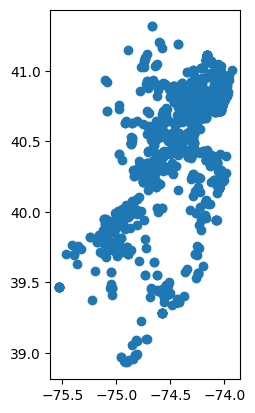

In [40]:
njCA.plot()

In [41]:
#njCA[['X','Y']]

In [42]:
gdf = geopandas.GeoDataFrame(
    njCA, geometry=geopandas.points_from_xy(njCA.NJSPC83_X, njCA.NJSPC83_Y) #, crs="EPSG:4326"
)

In [43]:
print(gdf.head(30))

    OBJECTID FUEL_TYPE                                       STATION_NAME  \
0          1      ELEC            Dock's Oyster House - Tesla Destination   
1          2      ELEC                    Central United Methodist Church   
2          3      ELEC                         RESORTS CASINO SURFACE LOT   
3          4      ELEC                              FAA - ACT - Station 1   
4          5      ELEC                              FAA - ACT - Station 2   
5          6      ELEC                                             WAVE 1   
6          7      ELEC                                             WAVE 6   
7          8      ELEC                                             WAVE 4   
8          9      ELEC                                             WAVE 3   
9         10      ELEC                                             WAVE 5   
10        11      ELEC                                             WAVE 2   
11        12      ELEC            Ocean Resort Casino - Tesla Destination   

<Axes: >

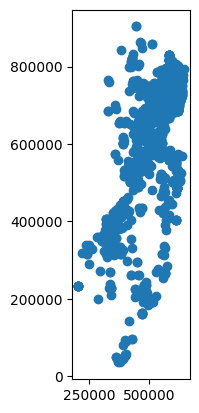

In [44]:
gdf.plot()

In [45]:
gdf['ex']=gdf['NJSPC83_X'].astype(float)

In [46]:
njC.dtypes

COUNTY           object
COUNTY_LAB       object
POP2010           int64
POPDEN2010        int64
geometry       geometry
U.S. County      object
dtype: object

In [47]:
njCAB_cam_cum=njCAB.query("COUNTY=='CAMDEN' | COUNTY=='CAPE MAY'")

<Axes: >

[]

[]

Text(0.5, 1.0, 'Alternative Fueled Vehicle')

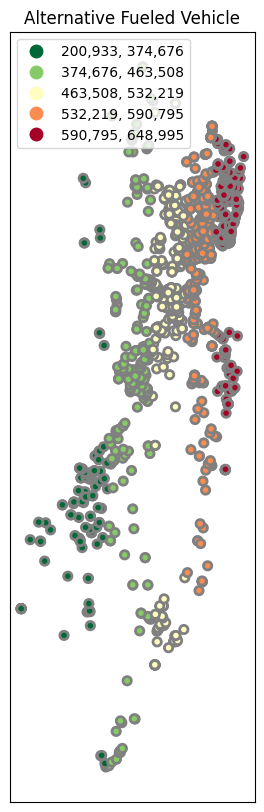

In [48]:
fig, ax = plt.subplots(figsize=(6,10))

gdf.plot(ax=ax,figsize=(20,30),column='ex',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"})
l1 = ax.get_legend()
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_title('Alternative Fueled Vehicle')



<Axes: >

<Axes: >

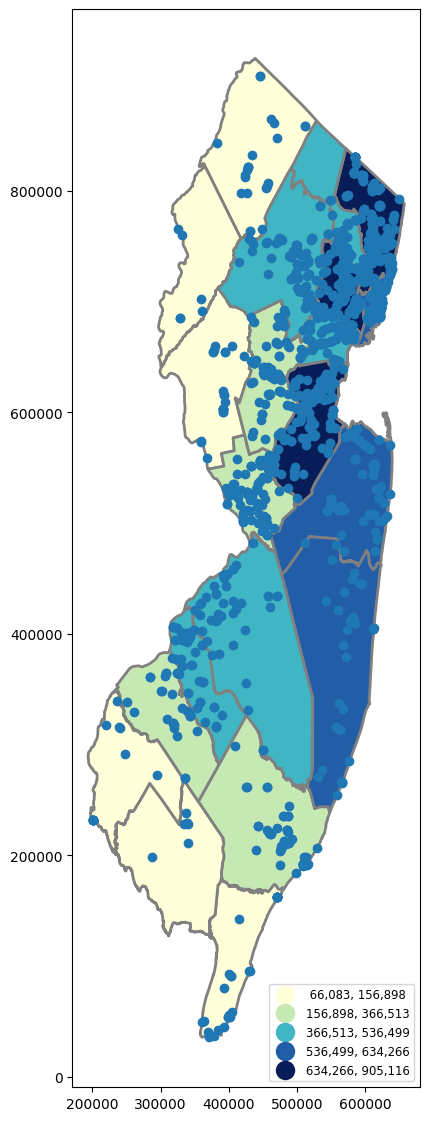

In [49]:
fig, ax = plt.subplots(1, figsize=(6,14))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
gdf.plot(ax=ax)

<Axes: >

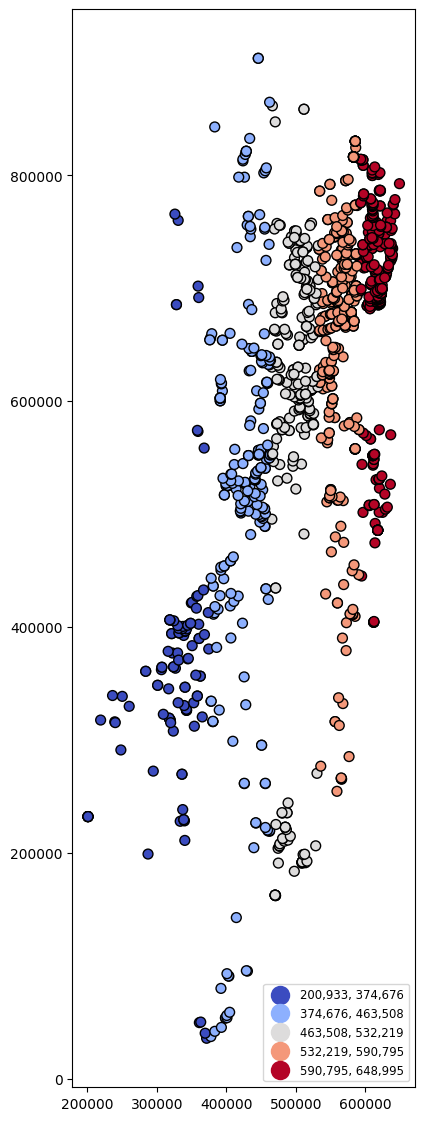

In [54]:
fig, ax = plt.subplots(1, figsize=(14,14))

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 50)

<Axes: >

'gdf.plot(ax=ax,column=\'ex\',legend=True,cmap=\'YlGnBu\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})'

Text(0.5, 1.0, 'X')

[]

[]

<Axes: title={'center': 'X'}>

<Axes: title={'center': 'AFV IN NJ'}>

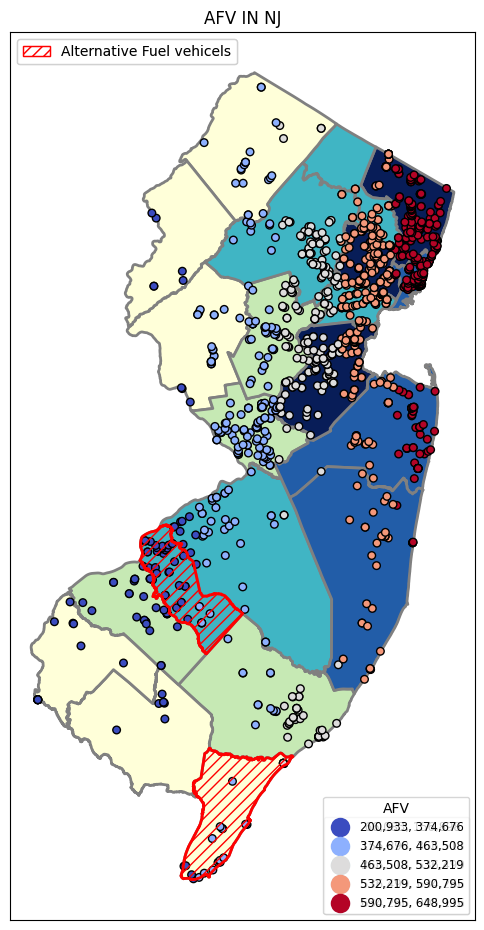

In [57]:
fig, ax = plt.subplots(1, figsize=(6,14))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
'''gdf.plot(ax=ax,column='ex',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})'''


l1 = ax.get_legend()
ax.set_title('X')
ax.set_xticks([]);ax.set_yticks([])
ax.add_artist(l1)

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 30)

ax.title.set_text("AFV IN NJ")

l2 = ax.get_legend()
l2.set_title('Alternative Fueled Vehicle')


njCAB_cam_cum.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

l1 = ax.get_legend()
l1.set_title('''AFV''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Alternative Fuel vehicels')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

'gdf.plot(ax=ax,column=\'ex\',legend=True,cmap=\'YlGnBu\',scheme=\'natural_breaks\',k=5,\n         edgecolor=\'black\',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",\n        \'loc\':\'lower left\',\'title_fontsize\':\'medium\',\'fontsize\':\'small\',\'markerscale\':1.4})'

Text(0.5, 1.0, 'X')

[]

[]

<Axes: title={'center': 'X'}>

<Axes: title={'center': 'AFV IN NJ'}>

Text(400000, 925000, 'more stations')

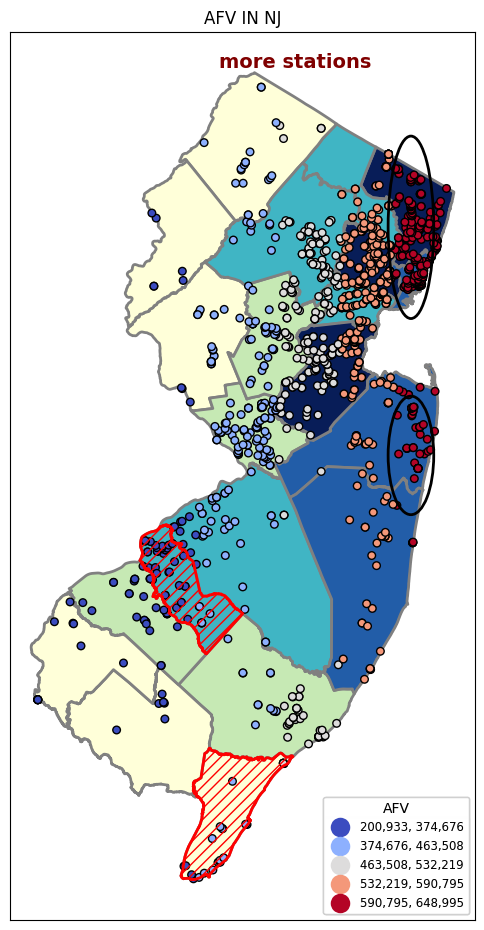

In [58]:
fig, ax = plt.subplots(1, figsize=(6,14))
njC.plot(ax=ax,column='POP2010',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
'''gdf.plot(ax=ax,column='ex',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})'''


l1 = ax.get_legend()
ax.set_title('X')
ax.set_xticks([]);ax.set_yticks([])
ax.add_artist(l1)

gdf.plot(ax=ax,column='ex',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 30)

ax.title.set_text("AFV IN NJ")

l2 = ax.get_legend()
l2.set_title('Alternative Fueled Vehicle')


njCAB_cam_cum.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')

l1 = ax.get_legend()
l1.set_title('''AFV''')


ax.add_artist(l2)
ax.add_artist(l1)

ax.text(400000, 925000, r'more stations', fontsize=14, color='maroon',fontweight='bold')

from matplotlib.patches import Ellipse
e1 = Ellipse(xy=(610000, 750000), width=50000, height=200000, edgecolor='black', fc='None', lw=2)
e2 = Ellipse(xy=(610000, 500000), width=50000, height=130000, edgecolor='black', fc='None', lw=2)
ax.add_patch(e1)
ax.add_patch(e2)

# New Section